In [30]:
import numpy as np
import wfdb
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

In [31]:
# Step 1: Load the combined multi-channel signal
# Record name of the combined signal
record_name = 'sub01_l1_c0_combined'  # Change to another record name as needed
record_path = os.path.join('combined_signals', record_name)

# Load the multi-channel signal from the .dat file
record = wfdb.rdrecord(record_path)
multi_channel_signal = record.p_signal  # This is now a matrix of shape (samples, 4)
print (len(multi_channel_signal))

# Sampling frequency
fs = record.fs

75000


In [32]:
# Step 2: Apply ICA for Blind Source Separation
# Initialize the FastICA model (let's separate into 4 components)
ica = FastICA(n_components=4, random_state=0)

# Fit and transform the mixed signal to get the estimated components
separated_signals = ica.fit_transform(multi_channel_signal)  # Shape: (samples, 4)

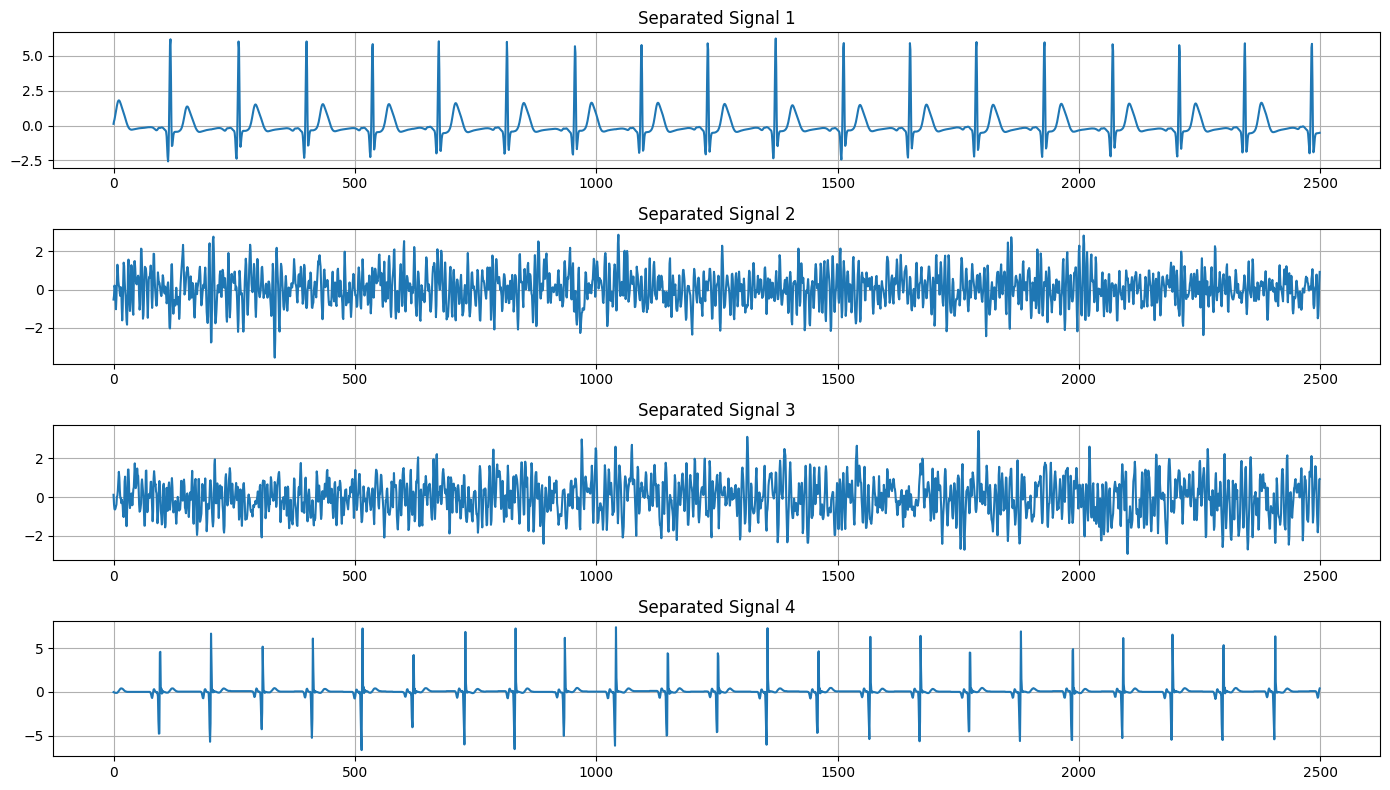

In [33]:
# Step 3: Plot the results
# Each column of separated_signals is a separated source
labels = ['Separated Signal 1', 'Separated Signal 2', 'Separated Signal 3', 'Separated Signal 4']

plt.figure(figsize=(14, 8))

for i in range(4):
    plt.subplot(4, 1, i+1)
    plt.plot(separated_signals[:record.fs*10, i])  # Plot the first 10 seconds (or adjust as needed)
    plt.title(labels[i])
    plt.grid()

plt.tight_layout()
plt.show()